In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from google.colab import drive
drive.mount('/content/drive')
house_df = pd.read_csv('/content/drive/MyDrive/dataScience/kc_house_data.csv')

Mounted at /content/drive


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [ ]:
#a)

x = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:

model.fit(x, y)
#Hint: .fit()

LinearRegression()

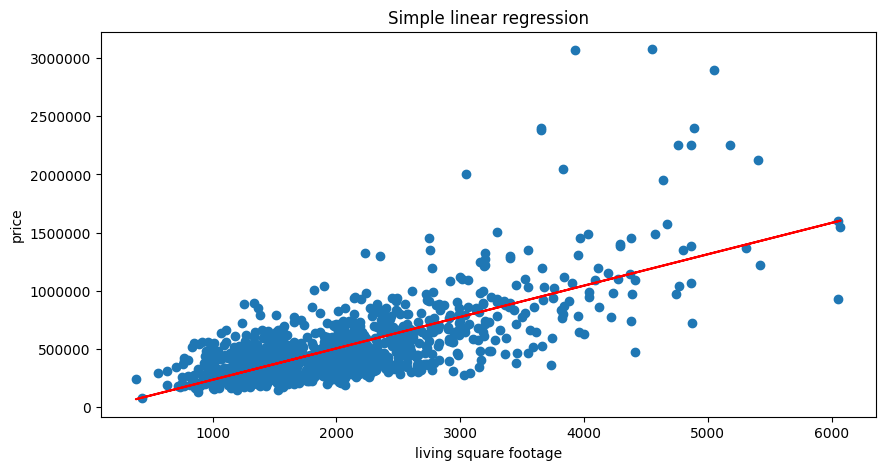

Coefficients: 
 [269.46205468]
Intercept:  -32304.654721028113
MSE:  57947526161.288376
Coefficient of determination: 0.49670880166311393


In [ ]:
#b)

#Your code:

predictions = model.predict(x)

fig = plt.figure(figsize=(10, 5))

plt.scatter(x, y)
plt.plot(x, predictions, c = 'r')

plt.xlabel('living square footage')
plt.ylabel('price')
plt.title('Simple linear regression')


plt.ticklabel_format(axis='y', style='plain')
plt.show()


print("Coefficients: \n", model.coef_)
print("Intercept: ", model.intercept_)
print("MSE: ", mean_squared_error(y, predictions))
print("Coefficient of determination:", model.score(x, y))
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

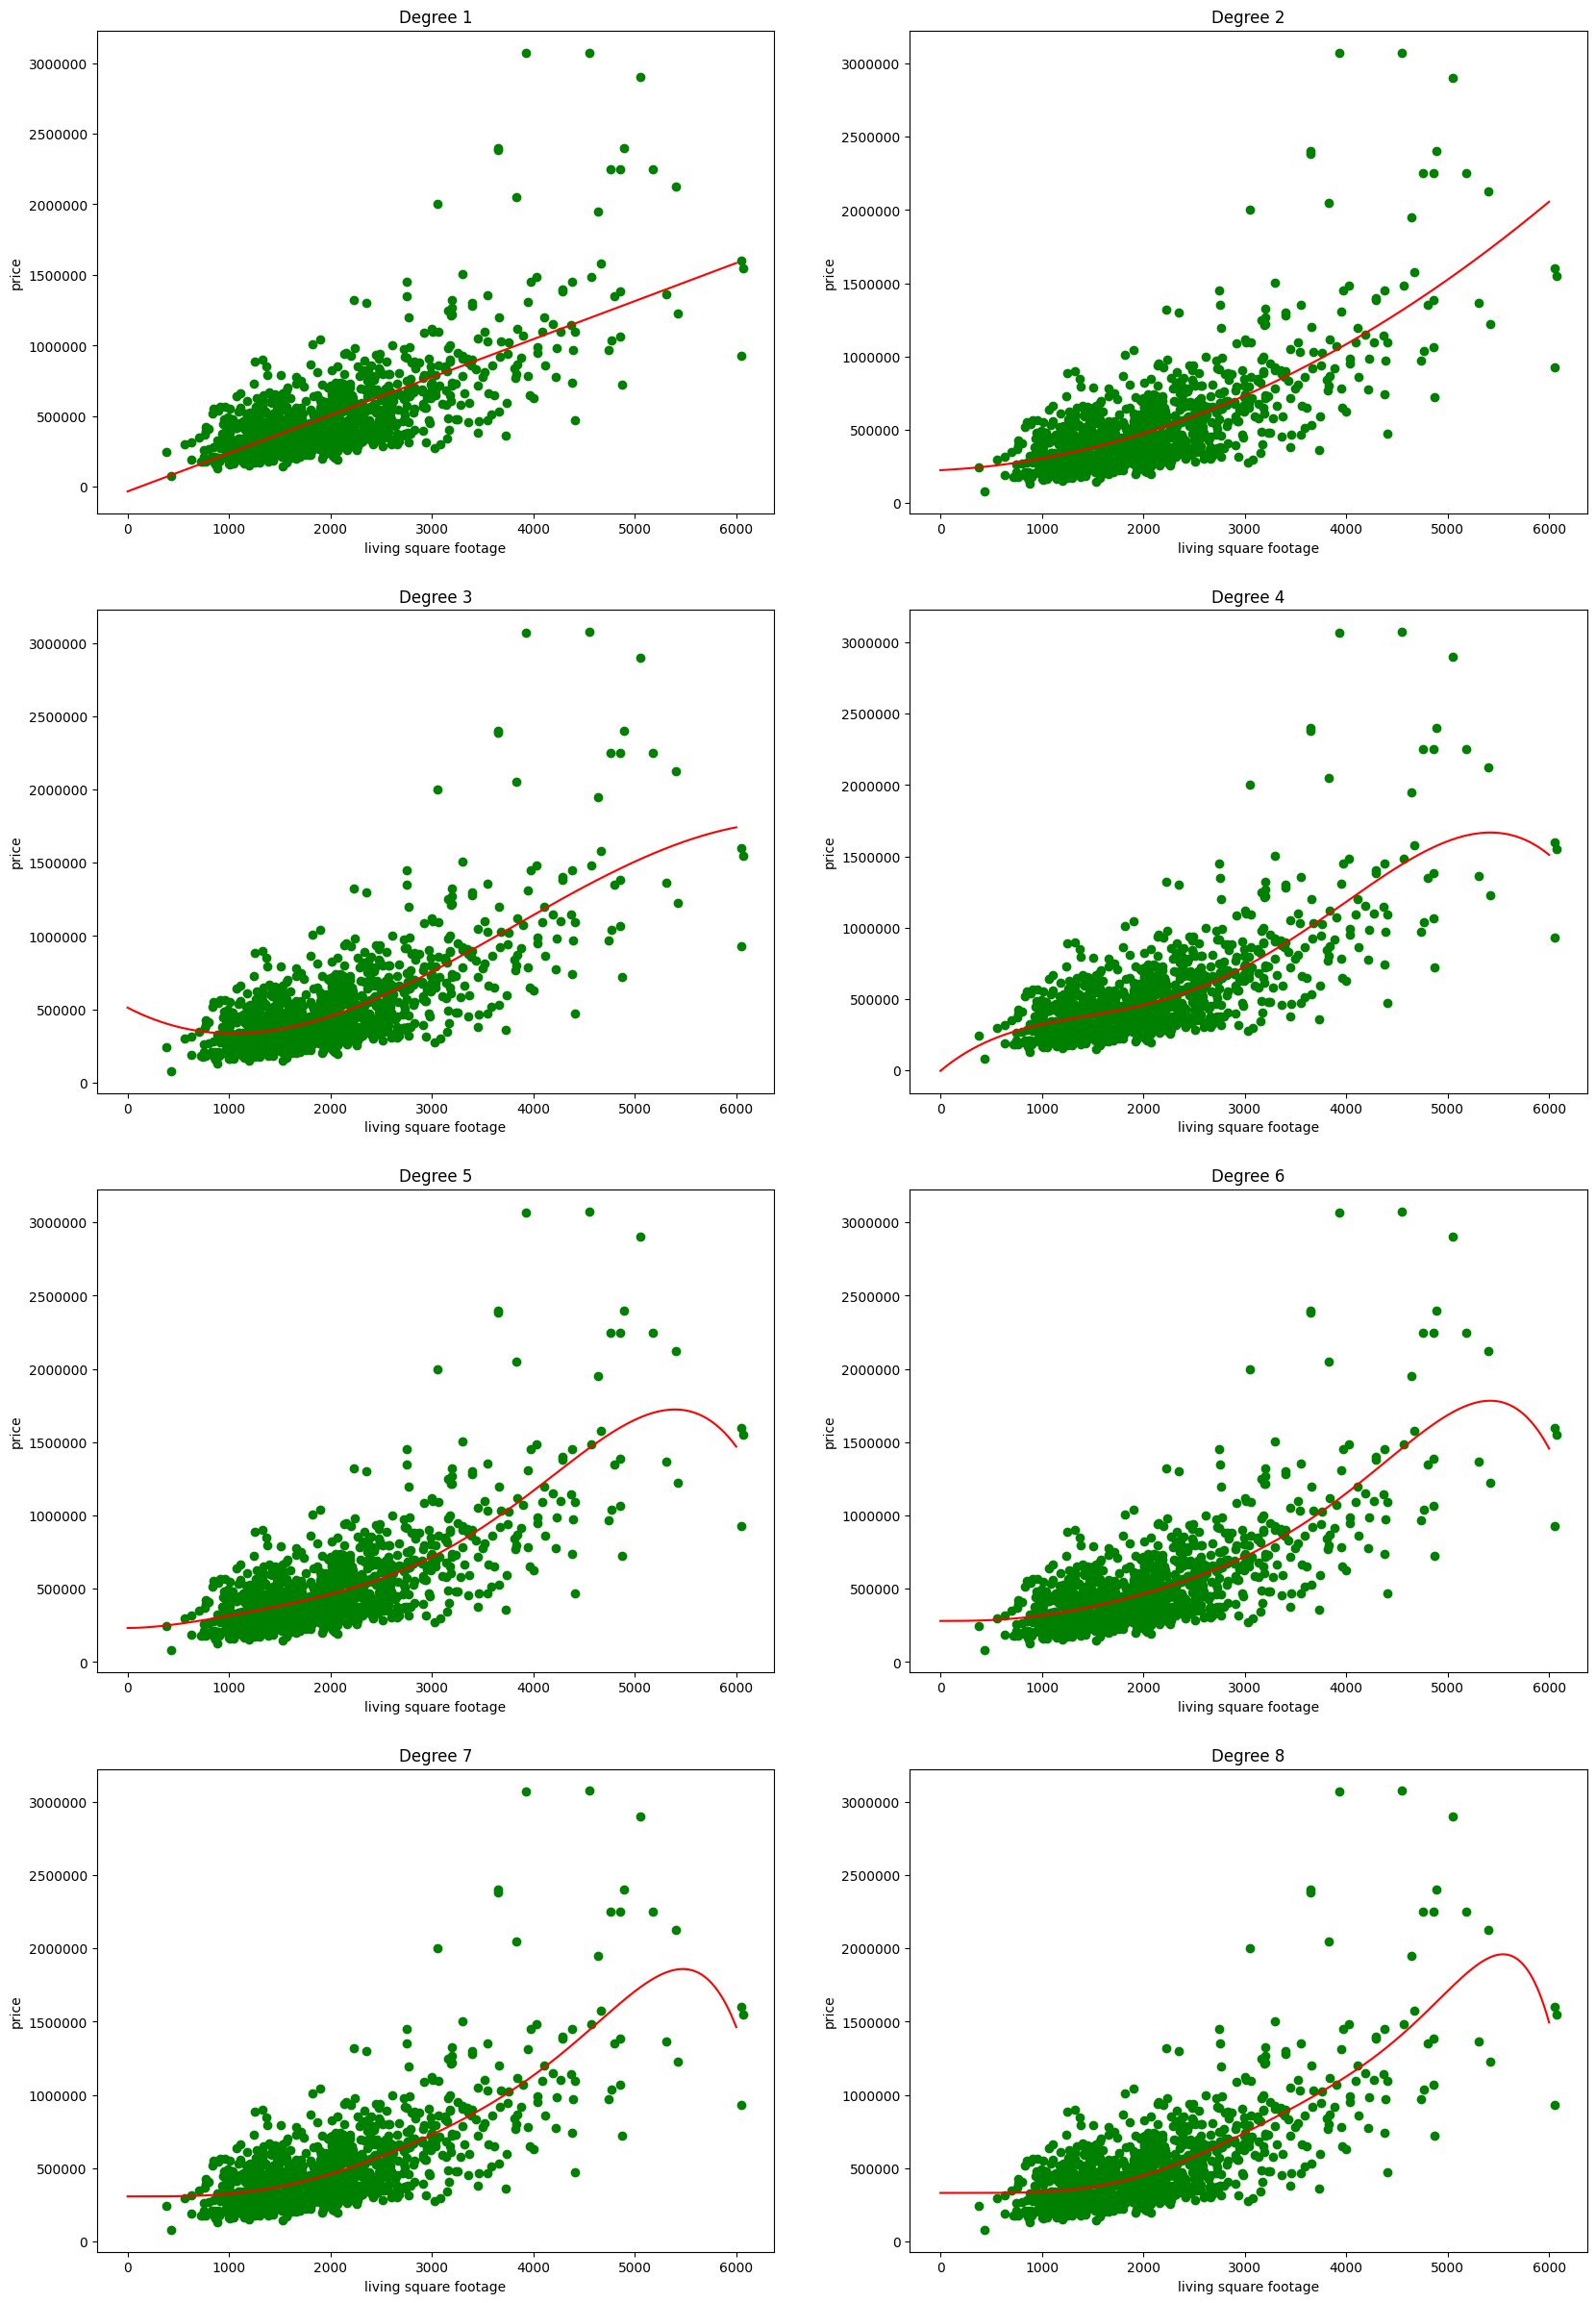

In [ ]:
#c)
fig = plt.figure(figsize = (20,30))
error = []

for order in range(1,9):
    x_lin = np.linspace(0, 6000, len(x))

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(x)
    X_plot = poly.fit_transform(x_lin.reshape(-1, 1))

    #Your code:
    model.fit(X_order, y)
    y_pred = model.predict(X_plot)

    plt.subplot(4, 2, order)
    plt.scatter(x, y, c = 'green')
    plt.plot(x_lin, y_pred, c= "red")

    plt.xlabel('living square footage')
    plt.ylabel('price')
    plt.title('Degree '+str(order))

    plt.ticklabel_format(axis='y', style='plain')
    error.append(mean_squared_error(model.predict(X_order), y))
plt.show()


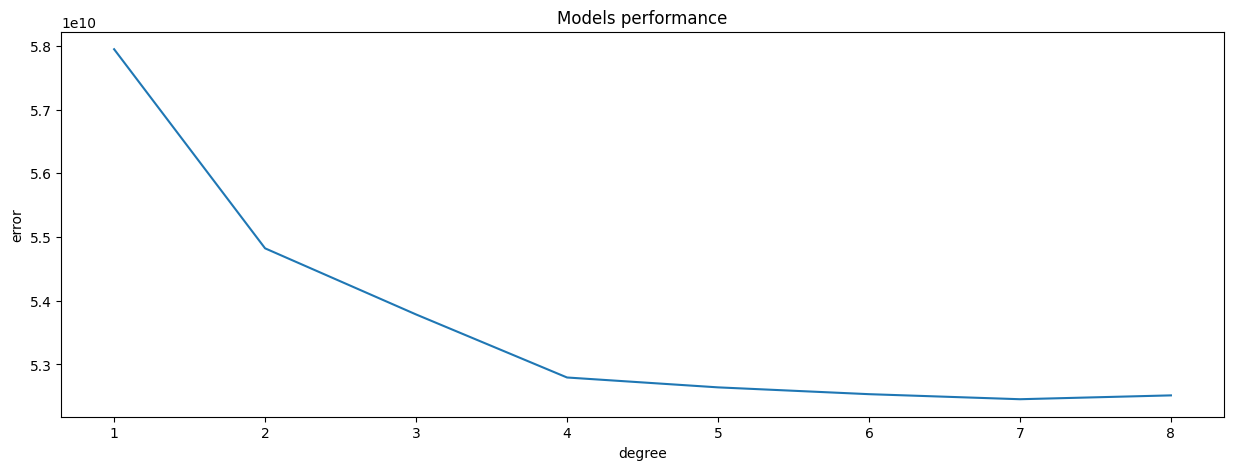

In [ ]:
#Your code:
fig = plt.figure(figsize=(15, 5))
degree = np.arange(1,9)

plt.plot(degree, error)
plt.xlabel('degree')
plt.ylabel('error')
plt.title('Models performance')
plt.show()


## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

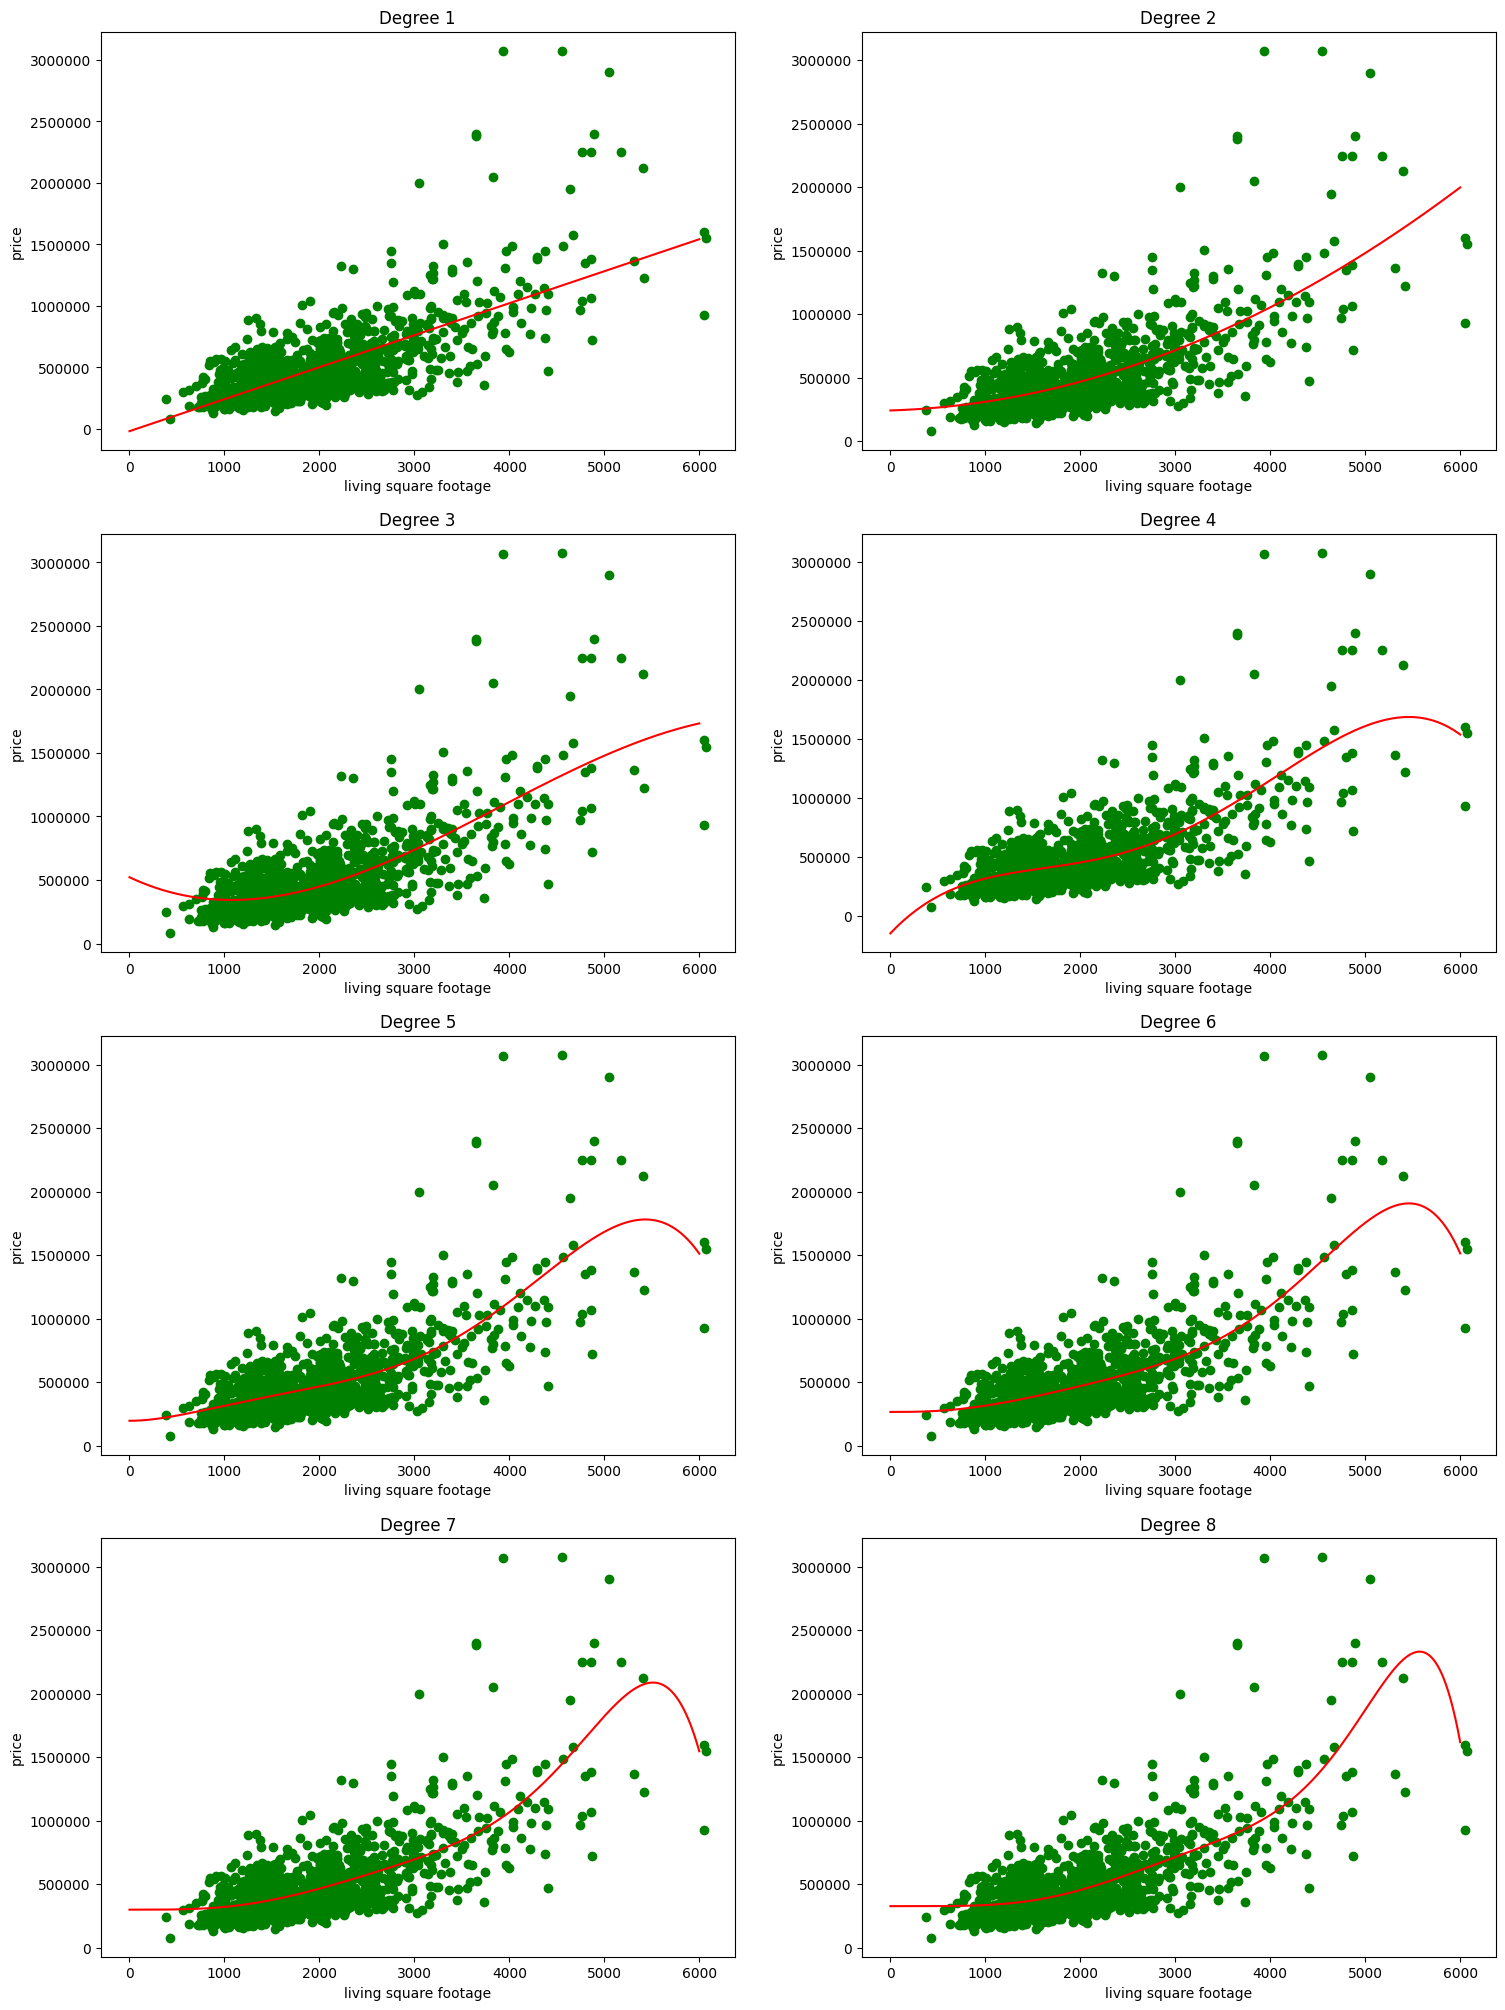

In [ ]:
#a)

fig = plt.figure(figsize=(18, 25))
error_train = []
error_test = []


for order in range(1,9):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=44)

    x_lin = np.linspace(0, 6000, len(X_train))

    poly = PolynomialFeatures(order, include_bias = False)
    X_train_order = poly.fit_transform(X_train)
    X_test_order = poly.fit_transform(X_test)
    X_plot = poly.fit_transform(x_lin.reshape(-1, 1))

    #Your code:
    model.fit(X_train_order, y_train)
    y_pred = model.predict(X_plot)

    plt.subplot(4, 2, order)
    plt.scatter(x, y, c = 'green')
    plt.plot(x_lin, y_pred, c= "red")

    plt.xlabel('living square footage')
    plt.ylabel('price')
    plt.title('Degree '+str(order))

    plt.ticklabel_format(axis='y', style='plain')
    error_train.append(mean_squared_error(model.predict(X_train_order), y_train))
    error_test.append(mean_squared_error(model.predict(X_test_order), y_test))
plt.show()



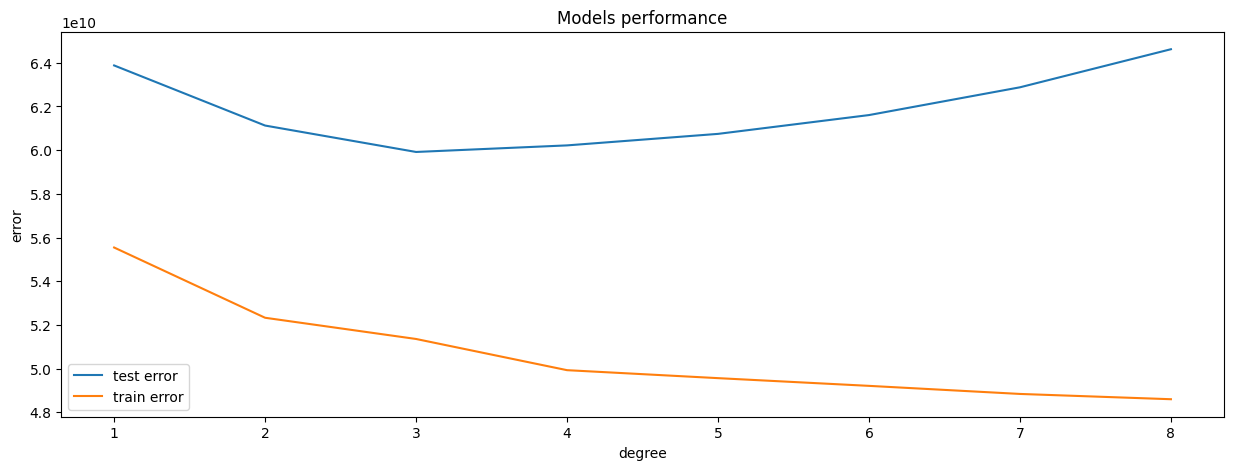

In [ ]:


fig = plt.figure(figsize=(15, 5))
degree = np.arange(1,9)

plt.plot(degree, error_test)
plt.plot(degree, error_train)

plt.xlabel('degree')
plt.ylabel('error')
plt.title('Models performance')
plt.legend(['test error','train error'])
plt.show()



## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

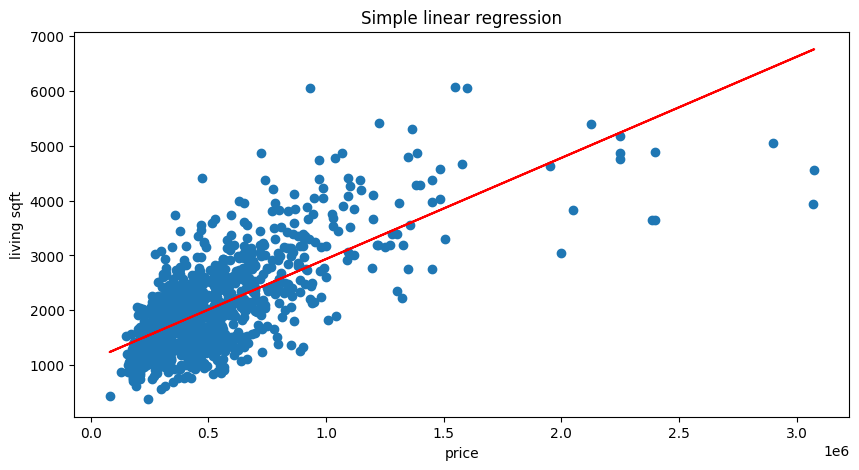

Coefficients: 
 [0.00184333]
Intercept:  1091.8971893889102
MSE:  396407.1889615157
Coefficient of determination: 0.49670880166311404


In [ ]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:

model.fit(X, y)

y_pred = model.predict(X)
fig = plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.plot(X, y_pred, c='r')

plt.xlabel("price")
plt.ylabel("living sqft")
plt.title("Simple linear regression")

plt.ticklabel_format(axis='y', style='plain')
plt.show()

print("Coefficients: \n", model.coef_)
print("Intercept: ", model.intercept_)
print("MSE: ", mean_squared_error(y, y_pred))
print("Coefficient of determination:", model.score(X, y))


In [ ]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
columns = ['bedrooms', 'bathrooms', 'floors',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
           'sqft_living15', 'sqft_lot15', 'condition']


Mean squared error equals: 48749267368.97092


In [ ]:
for col in columns:
  X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', col]].values.reshape(-1,5)
  y = house_df.price.values.reshape(-1)

  poly = PolynomialFeatures(3, include_bias = False)
  X = poly.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

  model = LinearRegression()
  _= model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  if(mean_squared_error(y_pred, y_test) < 48749267368.97092):
    print("Mean squared error equals: {0} for {1}".format(mean_squared_error(y_pred, y_test), col))

Mean squared error equals: 48033505441.09368 for sqft_above
Mean squared error equals: 47786049641.16491 for yr_renovated
Mean squared error equals: 46879506518.48055 for condition


In [ ]:
#we can see that yr_built effects it the most
columns.remove('yr_built')
for col in columns:
  X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'yr_built', col]].values.reshape(-1,6)
  y = house_df.price.values.reshape(-1)

  poly = PolynomialFeatures(3, include_bias = False)
  X = poly.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

  model = LinearRegression()
  _= model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  if(mean_squared_error(y_pred, y_test) < 42385099302.84319):
    print("Mean squared error equals: {0} for {1}".format(mean_squared_error(y_pred, y_test), col))


Mean squared error equals: 42070551537.43187 for sqft_above
Mean squared error equals: 42260051067.633385 for sqft_basement
Mean squared error equals: 42216577585.05316 for yr_renovated
Mean squared error equals: 38673855833.98279 for sqft_living15
